# Ques. 2.  Alphabetical Sort

***Imports:***

In [1]:
import numpy as np
import string

# 1. Counting Sort implementation

The next function **count_sort()** receives a list of INTEGERS, sorts this list according to counting sort algorithm, and returns a sorted list.<br/>

**NOTE:** Counting sort can be applied only for integers.<br/>

**Reference:** https://www.youtube.com/watch?v=7zuGmKfUt7s<br/>

In [2]:
def count_sort(lst):
    k=max(lst)
    counts= np.zeros(k+1,int) #O(k+1)
    sorted_lst= np.zeros(len(lst),int) #O(n)
    
    for i in lst: counts[i]+=1 #O(n)
        
    for i in range(k): counts[i+1]+=counts[i] #O(k)
        
    for i in lst:   #O(n)
        sorted_lst[counts[i]-1]=i
        counts[i]-=1
    return sorted_lst

In [3]:
print(count_sort([ 1, 4, 1, 2, 7, 5, 2, 7 ]))

[1 1 2 2 4 5 7 7]


**Complexity analysis**\
The initialization of the count array, and the second for loop which performs a prefix sum on the count array, each iterate at most k + 1 times and therefore take **O(k)** time. <br/>
The other two for loops, and the initialization of the output array, each take **O(n)** time.<br/>
Therefore, the time for the whole algorithm is the sum of the times for these steps, **O(n + k).**

# 2. Alphabets Sort 

As counting sort is only applied for integers, in order to sort alphabets using this kind of sort we have to:<br/>
**1-** Covert alphabets to integers. Using **char_position(letter)**<br/>
**2-** Sort the integers. Using **count_sort(lst)**<br/>
**3-** Convert integers back to alphabets. Using **pos_to_char(pos)**

In [4]:
alphabets=list(string.ascii_lowercase)

def char_position(letter):
    if letter=='':return -1
    return alphabets.index(letter)

def pos_to_char(pos):
    if(pos)==-1:return ''
    return alphabets[pos]

**NOTE** This method dosn't take into account upper case periority. If we need to take that into account, simply we have to create **alphabets** list as follow: ['A', 'a', 'B', 'b', 'C', 'c' ....] but n will be 52 instead of 26

In [5]:
char_position('x')

23

In [6]:
pos_to_char(23)

'x'

The following **sort_alphabets()** function takes a list of letters in any order and returns it ordered

In [7]:
def sort_alphabets(lst):
    lst_idx=[]
    for i in lst:
        lst_idx.append(char_position(i.lower()))
    out=count_sort(lst_idx)
    return [pos_to_char(i) for i in out]

In [8]:
all_alpha =['s','r','q','p','o','e','c','j','n','m','i','h','g',
            'z','w','v','b','l','u','t','f','d','k','a','y','x']
print('Sotred Alphabets: ',sort_alphabets(all_alpha))

Sotred Alphabets:  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


**Complexity analysis:**<br/>
<br/>
Assuming we have a list of 26 alphabets in order, elemnts are alphabets and indices are positions. To get position of target alphabet it takes **O(n)** at the worst case, but to get alphabet by position it takes only **O(1)**.<br/>
<br/>
Converting the input list of **alphabets into INTEGERS** will cost O(n).O(log(n)) = **O(nlog(n))** where n=26. if the input list is random then the cost could be **O(n^2)** in the worst case of ['z', 'z', 'z', 'z'] for example.<br/>
<br/>
As mentioned before, cost of counting sort is **O(n+k)** where **k** is the max value in input list.<br/>
<br/>
Converting the sorted **INTEGERS list back to alphabets** costs O(n).O(1) = **O(n)**<br/>
<br/>
the whole procces cost is: **O(nlog(n)) + O(n+k) + O(n)**, approximately = **O(nlog(n)) + O(3n)** as k = n = 26

# 3. Words Sort

List of words to be sorted:

In [9]:
words=['hi' , 'at', 'hello', 'this','those', 'there', 'from']

**words_mat()** functions takes the list of words and returns a matrix (m*n) of these words letters. m is number of words and n is the max word lenght in words.

In [10]:
def words_mat(words,n):
    mat=[]
    for i in words:
        mat.append([j for j in list(i)])
    for i in mat:
        while len(i)<n: i.append('')
    return mat

In [11]:
words_matrix= words_mat(words,5)

In [12]:
words_matrix

[['h', 'i', '', '', ''],
 ['a', 't', '', '', ''],
 ['h', 'e', 'l', 'l', 'o'],
 ['t', 'h', 'i', 's', ''],
 ['t', 'h', 'o', 's', 'e'],
 ['t', 'h', 'e', 'r', 'e'],
 ['f', 'r', 'o', 'm', '']]

In [13]:
def column(matrix, i): return [row[i] for row in matrix] #returns column by index

In [14]:
column(words_matrix,0)

['h', 'a', 'h', 't', 't', 't', 'f']

**Sort() function works as the following:**<br/>
1- sort all matrix with respect to the first column(index 0) **AND** keep the the rows which starting with same letter in one index as a list<br/>
<br/>
2- sort every index with length >1 with respect to the next column (index 1).<br/>
**if:** the values of the column are not equal, split the sorted rows to diffrent indeces<br/>
**else:** keep the block in one index and continue to the next columns<br/>
<br/>
3- when all indeces length equal to 1: stop

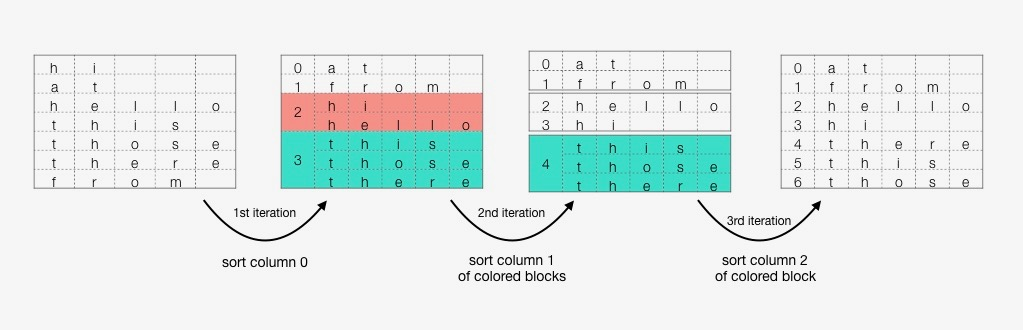

In [20]:
from IPython.display import Image
Image(filename =  "words_sort.jpg", width=1000, height=1000)

In [15]:
def sort(words_mat, m, n, p):
    if p==0:
        col= column(words_mat, p)
        sorted_col= sort_alphabets(col)
        sorted_mat=[]
        sorted_col_idx=[]
        for i in sorted_col:
            sorted_col_idx.append(([j for j, e in enumerate(col) if e == i]))
        cleanidx = []
        [cleanidx.append(x) for x in sorted_col_idx if x not in cleanidx]

        for i in cleanidx:
            sub=[]
            for j in i:
                sub.append(words_mat[j])
            sorted_mat.append(sub)
        words_mat=sorted_mat
        print('column: '+str(p)+' , matrix:',sorted_mat)
        return sort(sorted_mat, 9, 6, p+1)
    else:
        helper_mat= words_mat.copy()
        sorted_col_idx2=[]
        sub_idx=[j for j in range(len(words_mat)) if len(words_mat[j])>1]
        for sub in sub_idx:
            col2= column(words_mat[sub], p)
            sorted_col2= sort_alphabets(col2)
            if len(set(sorted_col2))==1: continue
            for k in sorted_col2: 
                sorted_col_idx2.append(([j for j, e in enumerate(col2) if e == k]))
            cleanidx2 = []
            [cleanidx2.append(x) for x in sorted_col_idx2 if x not in cleanidx2]
            sorted_sub=[]
            for i_ in cleanidx2:
                sorted_sub.append(words_mat[sub][i_[0]])
            del helper_mat[sub]
            for i_2 in sorted_sub:
                helper_mat.insert(sub,[i_2])
                sub+=1
            print('column: '+str(p)+' , matrix:',helper_mat)
            return sort(helper_mat, m, n, p+1)
        return helper_mat

In [16]:
result=sort(words_matrix, 7, 5, 0)
print('Sorted words: ')
for i in result:
    print(''.join(i[0]))

column: 0 , matrix: [[['a', 't', '', '', '']], [['f', 'r', 'o', 'm', '']], [['h', 'i', '', '', ''], ['h', 'e', 'l', 'l', 'o']], [['t', 'h', 'i', 's', ''], ['t', 'h', 'o', 's', 'e'], ['t', 'h', 'e', 'r', 'e']]]
column: 1 , matrix: [[['a', 't', '', '', '']], [['f', 'r', 'o', 'm', '']], [['h', 'e', 'l', 'l', 'o']], [['h', 'i', '', '', '']], [['t', 'h', 'i', 's', ''], ['t', 'h', 'o', 's', 'e'], ['t', 'h', 'e', 'r', 'e']]]
column: 2 , matrix: [[['a', 't', '', '', '']], [['f', 'r', 'o', 'm', '']], [['h', 'e', 'l', 'l', 'o']], [['h', 'i', '', '', '']], [['t', 'h', 'e', 'r', 'e']], [['t', 'h', 'i', 's', '']], [['t', 'h', 'o', 's', 'e']]]
Sorted words: 
at
from
hello
hi
there
this
those


**Complexity analysis:**

The complexity here is very high, to sort column it takes **O(nlog(n)) + O(3n)** like explained before. 
At the worst case here when sorting words, the complexity will goes to O(n).[O(nlog(n)) + O(3n)] = **O( n^2 . log(n) ) + O( 3 n^2 )**<br/>
Therefore, this counting sort algorithm is not convenient to this problem at all. it's designed to sort integer values that are in a fixed range, so it can't be applied to sort strings in efficient way.